In [1]:
pip install pandas scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])  

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']  


df_numeric = df[numeric_features].fillna(df[numeric_features].median())


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)


pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

import pandas as pd
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

print(pca_df.head())

        PC1       PC2
0  1.140660 -0.076520
1 -1.768445  0.133479
2  0.879196 -0.726606
3 -1.458103  0.071555
4  0.561252 -0.943713


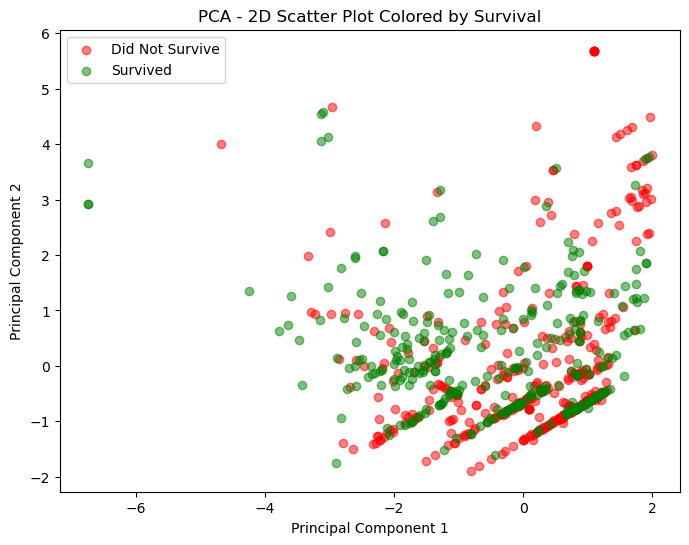

In [4]:
import matplotlib.pyplot as plt

pca_df['Survived'] = df['Survived'].values 


plt.figure(figsize=(8,6))
colors = ['red', 'green']
labels = ['Did Not Survive', 'Survived']

for surv in [0, 1]:
    subset = pca_df[pca_df['Survived'] == surv]
    plt.scatter(subset['PC1'], subset['PC2'], 
                c=colors[surv], label=labels[surv], alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Scatter Plot Colored by Survival')
plt.legend()
plt.show()